# Linear Regression
## Background reading:

*Intro to Statistical Learning*: 3.1 Simple Linear Regression, 3.2 Multiple Linear Regression, 3.3 Other Considerations in the Regression Model

*Ethical Algorithm*: Defining Fairness (Page 69-72)

## Dataset:
Dataset on Kaggle: https://www.kaggle.com/datasets/saravananselvamohan/freddie-mac-singlefamily-loanlevel-dataset

Freddie Mac Single Family Loan-Level Dataset: https://www.freddiemac.com/research/datasets/sf-loanlevel-dataset

Description of data fields: https://www.freddiemac.com/fmac-resources/research/pdf/file_layout.xlsx

The Federal Home Loan Mortgage Corporation, commonly known as Freddie Mac, is a publicly traded, government-sponsored enterprise, headquartered in Tysons Corner, Virginia. The FHLMC was created in 1970 to expand the secondary market for mortgages in the US: https://en.wikipedia.org/wiki/Freddie_Mac

The Federal National Mortgage Association, commonly known as Fannie Mae, is a United States government-sponsored enterprise and, since 1968, a publicly traded company: https://en.wikipedia.org/wiki/Fannie_Mae 

The primary difference between Freddie Mac and Fannie Mae is where they source their mortgages from. Fannie Mae buys mortgages from larger, commercial banks, while Freddie Mac buys them from much smaller banks.

Dataset: Home Mortgage Disclosure Act, National Loan Applications for 2020
https://ffiec.cfpb.gov/data-publication/dynamic-national-loan-level-dataset/2020 

Data field definitions/values: https://ffiec.cfpb.gov/documentation/2020/lar-data-fields/ 

In this tutorial we will use the dataset with the following attributes as an example:
31 Attributes In the dataset. We are going to use the following:
1. Credit Score
2. First Time Homebuyer flag
3. Original Debt to Income Ratio
4. Number of Borrowers
5. Original Interest Rate - this is what we want to predict

This is a case of prediction because we want to predict a buyer’s mortgage interest rate (outcome) based on application information (predictors)

## Essence of Data:


### How does Linear Regression Work?
The linear regression model has the form:
<div align = 'center'><font size = '6'>$Y=\beta_0+\beta_1X_1+...+\beta_pX_p+\epsilon$</font></div>

where $X_j$ represents the $j^th$ predictor and $\beta_j$ quantifies the association between that variable and the response. We interpret $\beta_j$ as the average effect on Y of a one unit increase in $X_j$, holding all other predictors fixed.

There are 2 Types of Linear Regression:
- Simple Linear Regression- used to predict a response on the basis of a single predictor variable.
- Multiple Linear Regression- used to predict a response on the basis of multiple predictor variables

Example from the textbook section 3.2:
<div align = 'center'><font size = '6'>$sales=\beta_0+\beta_1\times TV+\beta_2\times radio+\beta_2\times newspaper+\epsilon$</font></div>

Multiple linear regression model for the relationship between advertisement method and the resulting product sales.

![](./fig/LR/fig1.png)

Only TV and radio advertisements have a significance to product sales.


Implications: Bias in Algorithms used for Decision Making 
Article: Racial Bias in Mortgage Approval Aglorithms https://themarkup.org/denied/2021/08/25/the-secret-bias-hidden-in-mortgage-approval-algorithms 
https://themarkup.org/show-your-work/2021/08/25/how-we-investigated-racial-disparities-in-federal-mortgage-data 

Article: Inspecting Algorithms for Bias 
https://www.technologyreview.com/2017/06/12/105804/inspecting-algorithms-for-bias/ 




###Related Topics: forward vs backward selection, factor levels, dummy variables

### Forward vs backwards selection

### Forward selection:
1. Begins with a model that contains no variables (called the *Null Model*)
2. Begin adding the most significant variables one after the other
    - Variable significance can be calculated using a statistical significance test such as an f-test or t-test. The most significant variable will have the lowest p-value.
3. Continue to add significant variables until a pre-specified stopping rule is reached or until all the variables under consideration are included in the model
    - The pre-specified stopping rule could include a specific test of model prediction accuracy or a certain error level (such as MSE or MAE)

### Backwards selection:
1. Begins with a model that contains all variables under consideration (called the *Full Model*)
2. Then starts removing the least significant variables one after the other.
    - Variable significance can be calculated using a statistical significance test such as an f-test or t-test. The least significant variable will have the highest p-value.
3. Until a pre-specified stopping rule is reached or until no variable is left in the model.

### Factor Levels
*Factor levels-* a factor is a qualitative attribute variable. The number of levels is the number of possible values that the factor can have. 

### Dummy variables
*Dummy variables-* a variable that takes on one of two (or more)  binary outputs.
Ex: in the loan application tutorial the variable “first time home owner flag_n” is a dummy variable that changes the output no to 0 for not a first time homeowner and yes to 1 because linear regression cannot be performed using variables with a categorical output. 



In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import math
import sklearn
from sklearn import metrics
import seaborn as sns
import researchpy as rp

In [30]:
#load file as a dataframe
df = pd.read_csv('loan_level_500k.csv')
df

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT,SN
0,669.0,200206,N,202901,NaN,0.0,1.0,O,80.0,33.0,...,26100.0,F199Q1000004,P,320,2.0,Other sellers,Other servicers,True,False,199
1,732.0,199904,N,202903,17140.0,0.0,1.0,O,25.0,10.0,...,45200.0,F199Q1000005,N,360,1.0,Other sellers,Other servicers,True,False,199
2,679.0,200208,N,202902,15940.0,30.0,1.0,O,91.0,48.0,...,44700.0,F199Q1000007,P,319,1.0,Other sellers,Other servicers,True,False,199
3,721.0,200209,N,202902,38060.0,0.0,1.0,O,39.0,13.0,...,85200.0,F199Q1000013,N,318,2.0,Other sellers,Other servicers,True,False,199
4,618.0,200210,N,202902,10420.0,25.0,1.0,O,85.0,24.0,...,44200.0,F199Q1000015,N,317,2.0,Other sellers,Other servicers,True,False,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,200203,NaN,203202,33460.0,0.0,1.0,O,61.0,38.0,...,55400.0,F102Q1125986,C,360,1.0,WELLSFARGOHOMEMORTGA,"WELLSFARGOBANK,NA",True,False,102
500133,689.0,200203,NaN,203202,10580.0,0.0,1.0,O,70.0,39.0,...,12300.0,F102Q1125989,N,360,1.0,WELLSFARGOHOMEMORTGA,WELLSFARGOHOMEMORTGA,True,False,102
500134,798.0,200203,NaN,203202,19780.0,0.0,1.0,O,56.0,41.0,...,50300.0,F102Q1125990,C,360,1.0,WELLSFARGOHOMEMORTGA,"WELLSFARGOBANK,NA",True,False,102
500135,791.0,200203,NaN,203202,42044.0,0.0,1.0,O,26.0,18.0,...,92600.0,F102Q1125991,N,360,1.0,WELLSFARGOHOMEMORTGA,"WELLSFARGOBANK,NA",True,False,102


In [31]:
#checking dataset for null values
df.isna().sum()

CREDIT_SCORE                          2711
FIRST_PAYMENT_DATE                       0
FIRST_TIME_HOMEBUYER_FLAG           130559
MATURITY_DATE                            0
METROPOLITAN_STATISTICAL_AREA        70149
MORTGAGE_INSURANCE_PERCENTAGE        51048
NUMBER_OF_UNITS                          3
OCCUPANCY_STATUS                         0
ORIGINAL_COMBINED_LOAN_TO_VALUE         13
ORIGINAL_DEBT_TO_INCOME_RATIO        14929
ORIGINAL_UPB                             0
ORIGINAL_LOAN_TO_VALUE                   9
ORIGINAL_INTEREST_RATE                   0
CHANNEL                                  0
PREPAYMENT_PENALTY_MORTGAGE_FLAG      5178
PRODUCT_TYPE                             0
PROPERTY_STATE                           0
PROPERTY_TYPE                           95
POSTAL_CODE                             31
LOAN_SEQUENCE_NUMBER                     0
LOAN_PURPOSE                             0
ORIGINAL_LOAN_TERM                       0
NUMBER_OF_BORROWERS                    247
SELLER_NAME

In [35]:
#encode the columns that include text as numerical categories
from sklearn.preprocessing import LabelEncoder

#create an instance of label encoder
labelencoder = LabelEncoder()

#encode binary outcomes for first time homeowner flag column
df["First Time Homebuyer Flag_N"] = labelencoder.fit_transform(df["FIRST_TIME_HOMEBUYER_FLAG"])

df.isna().sum()

CREDIT_SCORE                          2711
FIRST_PAYMENT_DATE                       0
FIRST_TIME_HOMEBUYER_FLAG           130559
MATURITY_DATE                            0
METROPOLITAN_STATISTICAL_AREA        70149
MORTGAGE_INSURANCE_PERCENTAGE        51048
NUMBER_OF_UNITS                          3
OCCUPANCY_STATUS                         0
ORIGINAL_COMBINED_LOAN_TO_VALUE         13
ORIGINAL_DEBT_TO_INCOME_RATIO        14929
ORIGINAL_UPB                             0
ORIGINAL_LOAN_TO_VALUE                   9
ORIGINAL_INTEREST_RATE                   0
CHANNEL                                  0
PREPAYMENT_PENALTY_MORTGAGE_FLAG      5178
PRODUCT_TYPE                             0
PROPERTY_STATE                           0
PROPERTY_TYPE                           95
POSTAL_CODE                             31
LOAN_SEQUENCE_NUMBER                     0
LOAN_PURPOSE                             0
ORIGINAL_LOAN_TERM                       0
NUMBER_OF_BORROWERS                    247
SELLER_NAME

In [41]:
#identify which columns are our predictors and which is our target - added loan purpose and postal code

cols= ['ORIGINAL_INTEREST_RATE', 'CREDIT_SCORE', 'First Time Homebuyer Flag_N','ORIGINAL_DEBT_TO_INCOME_RATIO', 'NUMBER_OF_BORROWERS','POSTAL_CODE','LOAN_PURPOSE']
selected_df = df[cols]
selected_df = selected_df.dropna()

feature_cols= ['CREDIT_SCORE', 'First Time Homebuyer Flag_N','ORIGINAL_DEBT_TO_INCOME_RATIO', 'NUMBER_OF_BORROWERS']
predictors = selected_df[feature_cols]
target_col = ['ORIGINAL_INTEREST_RATE']
target = selected_df[target_col]


In [42]:
#split data into training set and test set
x_train, x_test, y_train, y_test =  train_test_split(predictors,target,test_size = 0.3)

In [43]:
#initiate the linear regression model
linreg = LinearRegression()
#fit it to the training data
linreg.fit(x_train,y_train)
y_pred = linreg.predict(x_test)

In [44]:
#print the coefficients for each predictor
print('Coefficients: \n', linreg.coef_)

Coefficients: 
 [[-0.0012612  -0.02485847  0.00328507 -0.07576751]]


G:\anocanda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


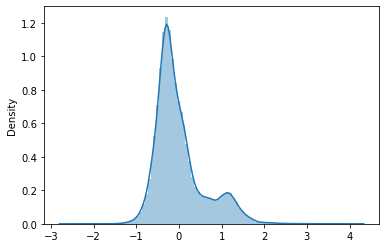

In [45]:
#plot the resdiual error for each point

sns.distplot((y_test-y_pred),bins = 100);

In [46]:
#print the mean absolute error, mean squared error, and root mean squared error to evaluate the model
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.43190140727891685
MSE: 0.3259932615642009
RMSE: 0.5709581959865371


In [11]:
#Looking at relationship between loan type and residual error from model

Text(0.5, 1.0, 'Loan Purpose')

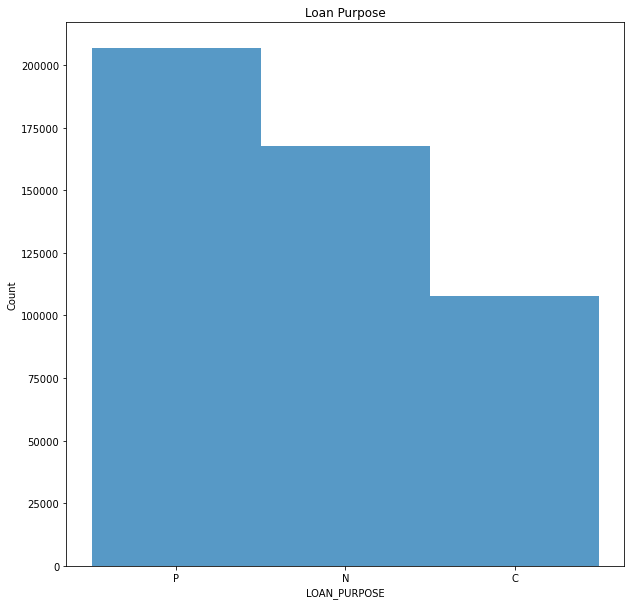

In [23]:
#looks like the model is more likely to predict too high of a rate for loans for purpose N ( Refinance - No Cash Out )
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=selected_df, x='LOAN_PURPOSE', edgecolor=None)
ax.set_title('Loan Purpose')

In [24]:
#added column in df of predicted rate, residual error, and whether error is negative or positive
selected_df['Predicted']=linreg.predict(selected_df[feature_cols])
selected_df['Residual Error']=selected_df['ORIGINAL_INTEREST_RATE']-selected_df['Predicted']
selected_df['Error Type']=''
selected_df.loc[selected_df['Residual Error']<=0,'Error Type']='Negative'
selected_df.loc[selected_df['Residual Error']>0,'Error Type']='Positive'


In [25]:
#check if the data is normally distributed - it isn't for any of the loan types (because p<0.05), can also see via histograms
#t test is ok even though data is not normally distributed because the sample is large
from scipy.stats import normaltest
s,p=normaltest(selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'P'])
print('Loan P: p=',p)
s,p1=normaltest(selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'N'])
print('Loan N: p=',p)
s,p2=normaltest(selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'C'])
print('Loan C: p=',p)
# plt.hist(selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'P'])
# plt.hist(selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'N'])
# plt.hist(selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'C'])

Loan P: p= 0.0
Loan N: p= 0.0
Loan C: p= 0.0


In [26]:
#look at the mean residual error for each loan type
print('Average residual error for Refinance - No Cash Out Loan:',selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'N'].mean())
print('Average residual error for Purchase Loan:',selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'P'].mean())
print('Average residual error for Refinance - Cash Out Loan:',selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'C'].mean())

Average residual error for Refinance - No Cash Out Loan: -0.09965768499485979
Average residual error for Purchase Loan: 0.12426936860557672
Average residual error for Refinance - Cash Out Loan: -0.08251817790132276


In [27]:
summary, results = rp.ttest(group1= selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'P'], group1_name= "Purchase",
                            group2= selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'N'], group2_name= "Refinance No Cash Out")
print('Purchase vs Refinance No Cash Out:',results.loc[results['Independent t-test']=='Two side test p value = '])
summary, results = rp.ttest(group1= selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'P'], group1_name= "Purchase",
                            group2= selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'C'], group2_name= "Refinance No Cash Out")
print('Purchase vs Refinance Cash Out:',results.loc[results['Independent t-test']=='Two side test p value = '])
summary, results = rp.ttest(group1= selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'C'], group1_name= "Purchase",
                            group2= selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'N'], group2_name= "Refinance No Cash Out")
print('Refinance No Cash Out vs Refinance Cash Out:',results.loc[results['Independent t-test']=='Two side test p value = '])

G:\anocanda\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
G:\anocanda\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


Purchase vs Refinance No Cash Out:          Independent t-test  results
3  Two side test p value =       0.0
Purchase vs Refinance Cash Out:          Independent t-test  results
3  Two side test p value =       0.0
Refinance No Cash Out vs Refinance Cash Out:          Independent t-test  results
3  Two side test p value =       0.0


G:\anocanda\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


In [ ]:
#The distributions are all statistically significantly different from each other, meaning that the model's residual error does differ for the different loan types

,sum_sq,df,F,PR(>F)
A,2.077674e-23,1.0,5.826916e+02,1.162010e-128
B,2.739312e-26,1.0,7.682505e-01,3.807592e-01
C,5.235713e-23,1.0,1.468376e+03,8.898122e-321
D,2.206766e-25,1.0,6.188961e+00,1.285530e-02
E,1.573794e+05,1.0,4.413766e+30,0.000000e+00
Residual,1.720230e-20,482445.0,NaN,NaN


## AI in fabrics of society:

The prediction of linear regression model is simple and explanable, while sometimes it will bring problems especially when applying to the real cases. 

In this tutorial, you may notice that the mortgage rate is various. The linear regression predicts the result based on the input variables we input into the model. One extreme case could be: In the database almost all records have low credits, while one of them has an excellent one. In that case "credit" will play less role when predicting the result and it is unfair for the person who has an excellent credit because he or she will tolerate a very high mortarage rate. This extreme condition seems to be rare, but the fairness problems occur ubiquiously in reality.

Since this is the first time you encounter the fairness problems, maybe it is strange. I believe after you think thoroughly into these topics and go through the problems, you will have a better understanding on the issue.

To begin with, read the paragraph on the book *The Ethical Algorithm*, page 69-72, try to understand why we focus on and care about fairness problems.

In [84]:
#Anova Test For The model

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
cols= ['CREDIT_SCORE', 'First Time Homebuyer Flag_N','ORIGINAL_DEBT_TO_INCOME_RATIO', 'NUMBER_OF_BORROWERS','ORIGINAL_INTEREST_RATE']
train=selected_df[cols]
#Rename The Train Title To Cancel Special Characters And To Avoid The Mismatch Of The Array
train.columns=['A','B','C','D','E']

#Anova Test
model = ols('E~A+B+C+D+E', data =train ).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
A,2.077674e-23,1.0,5.826916e+02,1.162010e-128
B,2.739312e-26,1.0,7.682505e-01,3.807592e-01
C,5.235713e-23,1.0,1.468376e+03,8.898122e-321
D,2.206766e-25,1.0,6.188961e+00,1.285530e-02
E,1.573794e+05,1.0,4.413766e+30,0.000000e+00
Residual,1.720230e-20,482445.0,NaN,NaN


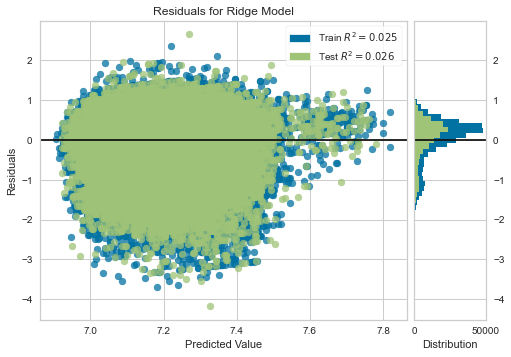

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [92]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

while True:
    try: 
        from yellowbrick.datasets import load_concrete
        from yellowbrick.regressor import ResidualsPlot
        break
    expcet:
        pip install yellowbrick
        continue
        
model = Ridge()
visualizer = ResidualsPlot(model,hist=True)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure